Welcome to the **[30 Days of ML competition](https://www.kaggle.com/c/30-days-of-ml/overview)**!  In this notebook, you'll learn how to make your first submission.

Before getting started, make your own editable copy of this notebook by clicking on the **Copy and Edit** button.

# Step 1: Import helpful libraries

We begin by importing the libraries we'll need.  Some of them will be familiar from the **[Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)** course and the **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** course.

In [1]:
# Familiar imports
import numpy as np
import pandas as pd
from scipy import stats

# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# For training random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import datetime as dt
from typing import Tuple, List, Dict
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#import plotly.express as px
#import plotly.offline



from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import TruncatedSVD, NMF, PCA

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel, chi2
from sklearn.utils import shuffle
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
RANDOM_STATE = 42

# Step 2: Load the data

Next, we'll load the training and test data.  

We set `index_col=0` in the code cell below to use the `id` column to index the DataFrame.  (*If you're not sure how this works, try temporarily removing `index_col=0` and see how it changes the result.*)

In [2]:
# Load the training data
#train = pd.read_csv("../input/30-days-of-ml/train.csv", index_col=0)
#test = pd.read_csv("../input/30-days-of-ml/test.csv", index_col=0)
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)
# Preview the data
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


The next code cell separates the target (which we assign to `y`) from the training features (which we assign to `features`).

In [3]:
# Separate target from features
y = train['target']
features = train.drop(['target'], axis=1)

# Preview features
features.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,B,D,A,F,A,O,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,B,D,A,D,A,F,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,B,D,A,E,C,K,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,B,D,A,E,A,N,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [4]:
train.shape

(300000, 25)

In [5]:
test.shape

(200000, 24)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 499995
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    200000 non-null  object 
 1   cat1    200000 non-null  object 
 2   cat2    200000 non-null  object 
 3   cat3    200000 non-null  object 
 4   cat4    200000 non-null  object 
 5   cat5    200000 non-null  object 
 6   cat6    200000 non-null  object 
 7   cat7    200000 non-null  object 
 8   cat8    200000 non-null  object 
 9   cat9    200000 non-null  object 
 10  cont0   200000 non-null  float64
 11  cont1   200000 non-null  float64
 12  cont2   200000 non-null  float64
 13  cont3   200000 non-null  float64
 14  cont4   200000 non-null  float64
 15  cont5   200000 non-null  float64
 16  cont6   200000 non-null  float64
 17  cont7   200000 non-null  float64
 18  cont8   200000 non-null  float64
 19  cont9   200000 non-null  float64
 20  cont10  200000 non-null  float64
 21  cont11  20

In [8]:
train.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [9]:
test.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.526858,0.460882,0.491686,0.496263,0.492200,0.509944,0.468050,0.537617,0.497587,0.474630,0.473625,0.473589,0.492756,0.508303
std,0.230506,0.213896,0.252852,0.219304,0.240251,0.228100,0.210167,0.218197,0.239337,0.217558,0.255307,0.221844,0.247105,0.222977
min,-0.117993,-0.069316,-0.056095,0.130655,0.255903,0.045921,-0.224613,0.203763,-0.260236,0.117894,0.048734,0.052615,-0.074201,0.151052
25%,0.405787,0.310536,0.302189,0.328865,0.284188,0.353682,0.342813,0.356482,0.332762,0.306940,0.274991,0.308495,0.288094,0.300697
50%,0.496602,0.427656,0.503075,0.464590,0.395080,0.488378,0.429819,0.505216,0.438716,0.434610,0.460042,0.433857,0.422065,0.472446
75%,0.666389,0.615041,0.648234,0.663401,0.697252,0.668586,0.573861,0.703289,0.605368,0.610768,0.690143,0.642201,0.711038,0.758496
max,1.058434,0.887253,1.034687,1.039558,1.055423,1.067641,1.111540,1.032823,1.040208,0.982928,1.055955,1.071445,0.975032,0.906013


In [10]:

train.loc[:, 'cat0':'cat9'].value_counts()



cat0  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9
A     A     A     C     B     D     A     E     A     F       5196
      B     A     C     B     B     A     E     C     I       3884
B     A     A     C     B     D     A     E     A     F       3764
A     B     A     C     B     B     A     E     E     I       3511
                                                C     F       3210
                                                              ... 
                        C     D     B     E     E     I          1
                                    C     E     A     G          1
                                                C     N          1
                                                E     F          1
B     B     B     D     D     D     A     E     E     G          1
Length: 14782, dtype: int64

In [11]:
train.loc[:, 'cat0':'cat9'].nunique()

cat0     2
cat1     2
cat2     2
cat3     4
cat4     4
cat5     4
cat6     8
cat7     8
cat8     7
cat9    15
dtype: int64

In [12]:
print('Missing values in train dataset:', sum(train.isnull().sum()))
print('Missing values in test dataset:', sum(test.isnull().sum()))

Missing values in train dataset: 0
Missing values in test dataset: 0


# Step 3: Prepare the data

Next, we'll need to handle the categorical columns (`cat0`, `cat1`, ... `cat9`).  

In the **[Categorical Variables lesson](https://www.kaggle.com/alexisbcook/categorical-variables)** in the Intermediate Machine Learning course, you learned several different ways to encode categorical variables in a dataset.  In this notebook, we'll use ordinal encoding and save our encoded features as new variables `X` and `X_test`.

In [13]:
# List of categorical columns
object_cols = [col for col in features.columns if 'cat' in col]
numerical_cols = [cname for cname in train.columns if 
                train[cname].dtype in ['int64', 'float64']]
# ordinal-encode categorical columns
X = features.copy()
X_test = test.copy()
#ordinal_encoder = OrdinalEncoder()
#X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])
#X_test[object_cols] = ordinal_encoder.transform(test[object_cols])

# Preview the ordinal-encoded features
X.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
2,B,B,A,A,B,D,A,F,A,O,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
3,A,A,A,C,B,D,A,D,A,F,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
4,B,B,A,C,B,D,A,E,C,K,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
6,A,A,A,C,B,D,A,E,A,N,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [14]:
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_selector(X)

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

In [15]:
'''num_rows, num_cols = 4,4
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
f.suptitle('Distribution of Features', fontsize=16)

for index, column in enumerate(train[numerical_cols].columns):
    i,j = (index // num_cols, index % num_cols)
    g = sns.kdeplot(train[column], color="m", shade=True, label="%.2f"%(train[column].skew()), ax=axes[i,j])
    g = g.legend(loc="best")

f.delaxes(axes[3, 2])
f.delaxes(axes[3, 3])
plt.tight_layout()
plt.show()'''

'num_rows, num_cols = 4,4\nf, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))\nf.suptitle(\'Distribution of Features\', fontsize=16)\n\nfor index, column in enumerate(train[numerical_cols].columns):\n    i,j = (index // num_cols, index % num_cols)\n    g = sns.kdeplot(train[column], color="m", shade=True, label="%.2f"%(train[column].skew()), ax=axes[i,j])\n    g = g.legend(loc="best")\n\nf.delaxes(axes[3, 2])\nf.delaxes(axes[3, 3])\nplt.tight_layout()\nplt.show()'

In [16]:
'''sns.pairplot(train, kind="hist", corner=True)'''

'sns.pairplot(train, kind="hist", corner=True)'

In [17]:
'''f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

f.suptitle('Target', fontsize=16)
g = sns.kdeplot(train['target'], shade=True, label="%.2f"%(train['target'].skew()), ax=axes[0])
g = g.legend(loc="best")
stats.probplot(train['target'], plot=axes[1])
sns.boxplot(x='target', data=train, orient='h', ax=axes[2]);

plt.tight_layout()
plt.show()'''

'f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))\n\nf.suptitle(\'Target\', fontsize=16)\ng = sns.kdeplot(train[\'target\'], shade=True, label="%.2f"%(train[\'target\'].skew()), ax=axes[0])\ng = g.legend(loc="best")\nstats.probplot(train[\'target\'], plot=axes[1])\nsns.boxplot(x=\'target\', data=train, orient=\'h\', ax=axes[2]);\n\nplt.tight_layout()\nplt.show()'

In [18]:
'''corr = train[numerical_cols].corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(14, 14))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues_r',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)
# yticks
plt.yticks(rotation=0)
plt.show()'''

'corr = train[numerical_cols].corr().abs()\nmask = np.triu(np.ones_like(corr, dtype=np.bool))\n\nfig, ax = plt.subplots(figsize=(14, 14))\n\n# plot heatmap\nsns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=\'Blues_r\',\n            cbar_kws={"shrink": .8}, vmin=0, vmax=1)\n# yticks\nplt.yticks(rotation=0)\nplt.show()'

In [19]:
'''num_rows, num_cols = 3,4
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
#f.suptitle('Distribution of Features', fontsize=16)

for index, column in enumerate(train[object_cols].columns):
    i,j = (index // num_cols, index % num_cols)
    sns.histplot(x=column, data=train, ax=axes[i,j])

f.delaxes(axes[2, 2])
f.delaxes(axes[2, 3])
plt.tight_layout()
plt.show()'''



"num_rows, num_cols = 3,4\nf, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))\n#f.suptitle('Distribution of Features', fontsize=16)\n\nfor index, column in enumerate(train[object_cols].columns):\n    i,j = (index // num_cols, index % num_cols)\n    sns.histplot(x=column, data=train, ax=axes[i,j])\n\nf.delaxes(axes[2, 2])\nf.delaxes(axes[2, 3])\nplt.tight_layout()\nplt.show()"

UMAP

Only Use Continuous Feature for Dimension Reduction


In [20]:
'''from umap import UMAP

# Dimension Reduction
train_sub = train.sample(30000)
target = train_sub['target'] 
data_sub = train_sub.drop([col for col in train.columns if 'cat' in col], axis=1)

umap = UMAP(random_state=0)
train_umap = umap.fit_transform(data_sub, target)'''

"from umap import UMAP\n\n# Dimension Reduction\ntrain_sub = train.sample(30000)\ntarget = train_sub['target'] \ndata_sub = train_sub.drop([col for col in train.columns if 'cat' in col], axis=1)\n\numap = UMAP(random_state=0)\ntrain_umap = umap.fit_transform(data_sub, target)"

In [21]:
'''fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].scatter(train_umap[target==1][:,0], train_umap[target==1][:,1], c='#8abbd0', alpha=0.25, label='Target:1')
ax[0][0].scatter(train_umap[target==0][:,0], train_umap[target==0][:,1], c='#4a4a4a', alpha=0.25, label='Target:0')


ax[0][1].set_visible(False)

ax[1][0].scatter(train_umap[target==1][:,0], train_umap[target==1][:,1], c='#8abbd0', alpha=0.25, label='Target:1')
ax[1][1].scatter(train_umap[target==0][:,0], train_umap[target==0][:,1], c='#4a4a4a', alpha=0.25, label='Target:0')

for i in range(2):
    for j in range(2):
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        for s in ["top","right","left", 'bottom']:
            ax[i][j].spines[s].set_visible(False)

        ax[i][j].legend()

# Text Part
fig.text(0.97, 1, '[UMAP] Embedding Space', fontweight='bold', fontfamily='serif', fontsize=20, ha='right')   

fig.text(0.97, 0.94, '''
#In dimension reduction, 
#you can see that the data with target=0 are gathered in the center.
#Performance can be expected when used as a feature.

''', 
         fontweight='light', fontfamily='serif', fontsize=12, va='top', ha='right')           
        
plt.tight_layout()
plt.show()'''

", \n         fontweight='light', fontfamily='serif', fontsize=12, va='top', ha='right')           \n        \nplt.tight_layout()\nplt.show()"

In [22]:
#try:
#    import mymodule
#except ImportError as e:
#    pass  # module doesn't exist, deal with it.
#! pip install xlrd
#! pip install autoviz

In [23]:
'''from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dftc = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='target', 
    dfte=train, 
    header=0, 
    verbose=2, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=300000, 
    max_cols_analyzed=30
)'''

"from autoviz.AutoViz_Class import AutoViz_Class\n\nAV = AutoViz_Class()\ndftc = AV.AutoViz(\n    filename='', \n    sep='' , \n    depVar='target', \n    dfte=train, \n    header=0, \n    verbose=2, \n    lowess=False, \n    chart_format='png', \n    max_rows_analyzed=300000, \n    max_cols_analyzed=30\n)"

In [24]:
cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector))
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79490>),
                                ('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79550>)])

In [25]:
N_FEATURES_OPTIONS = [2, 4,  12,  20, 24]          #[2, 4, 8, 12, 16, 20, 24]

In [26]:
cv = KFold(10, shuffle  = True, random_state = RANDOM_STATE)

Next, we break off a validation set from the training data.

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = RANDOM_STATE)

In [28]:
X_train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
216313,B,A,A,C,B,D,A,E,E,J,...,0.314193,0.760721,0.370251,0.514081,0.594438,0.342460,0.729278,0.276733,0.805140,0.857009
237018,B,B,A,A,B,B,A,E,E,G,...,0.351498,0.194166,0.358321,0.311238,0.258699,0.437546,0.688655,0.362859,0.233861,0.475991
12977,B,B,A,C,B,D,A,D,A,O,...,0.913592,0.866297,0.589529,0.885561,0.872805,0.833381,1.048227,0.430139,0.932058,0.587268
70224,A,B,A,C,B,B,A,E,C,H,...,0.767636,0.343027,0.269991,0.231929,0.605238,0.171806,0.322880,0.321300,0.197064,0.200458
447936,B,B,A,C,B,B,A,E,E,A,...,0.747087,0.400603,0.629036,0.898131,0.388709,0.306797,0.287512,0.594247,0.343796,0.293591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199831,A,A,A,C,B,D,A,D,A,F,...,0.462919,0.770884,0.594021,1.032560,0.905694,0.852805,0.809571,0.358780,0.823077,0.865032
432183,B,A,A,D,B,B,A,E,E,B,...,0.267991,0.135453,0.361353,0.900748,0.468781,0.267659,0.695161,0.421088,0.841941,0.615257
219870,B,A,B,C,B,D,A,E,A,F,...,0.609992,0.532580,0.705946,0.896323,0.639372,0.598032,0.490381,0.134411,0.764455,0.240164


In [29]:
Xc = X_train.copy()
yc =y_train.copy()

# Label encoding for categoricals
for colname in Xc.select_dtypes("object"):
    Xc[colname], _ = Xc[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
object_cols = Xc.dtypes == int    

In [30]:
Xc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225000 entries, 216313 to 203204
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    225000 non-null  int64  
 1   cat1    225000 non-null  int64  
 2   cat2    225000 non-null  int64  
 3   cat3    225000 non-null  int64  
 4   cat4    225000 non-null  int64  
 5   cat5    225000 non-null  int64  
 6   cat6    225000 non-null  int64  
 7   cat7    225000 non-null  int64  
 8   cat8    225000 non-null  int64  
 9   cat9    225000 non-null  int64  
 10  cont0   225000 non-null  float64
 11  cont1   225000 non-null  float64
 12  cont2   225000 non-null  float64
 13  cont3   225000 non-null  float64
 14  cont4   225000 non-null  float64
 15  cont5   225000 non-null  float64
 16  cont6   225000 non-null  float64
 17  cont7   225000 non-null  float64
 18  cont8   225000 non-null  float64
 19  cont9   225000 non-null  float64
 20  cont10  225000 non-null  float64
 21  cont1

In [31]:
type(Xc['cat0'][2])

numpy.int64

In [32]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    color = np.array(["C0"] * scores.shape[0])
    # Color red for probes
    idx = [i for i, col in enumerate(scores.index)
           if col.startswith("PROBE")]
    color[idx] = "C3"
    # Create plot
    plt.barh(width, scores, color=color)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [33]:
mi_scores = make_mi_scores(X_train, y_train)

cont12    0.022814
cont10    0.018945
cont9     0.010004
cont2     0.009632
cat8      0.009285
cont3     0.008866
cont4     0.008835
cat5      0.008541
cont7     0.007951
cont8     0.007818
cont0     0.005690
cat1      0.005297
cont5     0.005255
cont11    0.005236
cont6     0.003730
cat9      0.002877
cont13    0.001562
cont1     0.001428
cat7      0.001260
cat0      0.001167
Name: MI Scores, dtype: float64


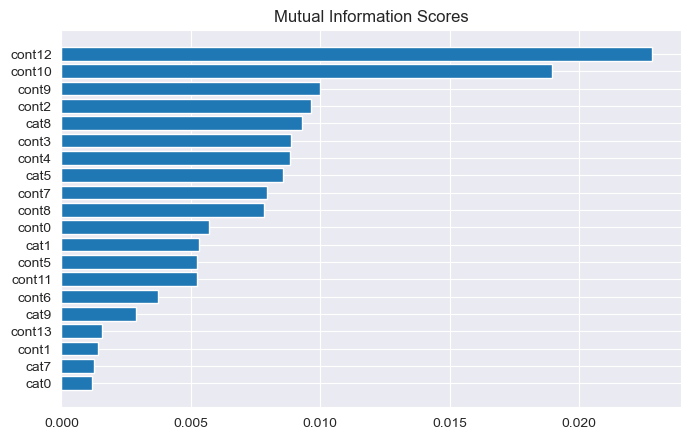

In [34]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

In [35]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

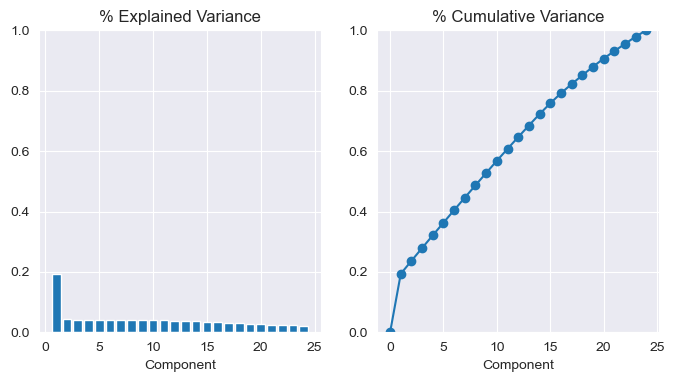

In [36]:
# Standardize
Xc_scaled = (Xc - Xc.mean(axis=0)) / Xc.std(axis=0)

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
Xc_pca = pca.fit_transform(Xc_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(Xc_pca.shape[1])]
Xc_pca = pd.DataFrame(Xc_pca, columns=component_names)

Xc_pca.head()


loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=Xc.columns,  # and the rows are the original features
)

plot_variance(pca);

# Step 4: Train a model

Now that the data is prepared, the next step is to train a model.  

If you took the **[Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)** courses, then you learned about **[Random Forests](https://www.kaggle.com/dansbecker/random-forests)**.  In the code cell below, we fit a random forest model to the data.

In [37]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y_train)

'continuous'

In [38]:
rf_pipeline = make_pipeline(
    tree_preprocessor, PCA(random_state = RANDOM_STATE), RandomForestRegressor(random_state = RANDOM_STATE ))
rf_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79490>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79550>)])),
                ('pca', PCA(random_state=42)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True))

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector))
linear_preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicator=True))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79490>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79550>)])

In [40]:
from sklearn.linear_model import LassoCV

lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV(random_state = RANDOM_STATE))
lasso_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79490>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79550>)])),
                ('lassocv', LassoCV(random_state=42))])

In [41]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

gbdt_pipeline = make_pipeline(
    tree_preprocessor, PCA(random_state = RANDOM_STATE), HistGradientBoostingRegressor(random_state = RANDOM_STATE))
gbdt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79490>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79550>)])),
                ('pca', PCA(random_state=42)),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(random_state=42))])

In [42]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [('Random_Forest', rf_pipeline),
              ('Lasso', lasso_pipeline),
              ('Gradient_Boosting', gbdt_pipeline)]

stacking_regressor = StackingRegressor(
    estimators = estimators,cv = cv, final_estimator = RidgeCV())
stacking_regressor

StackingRegressor(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                  estimators=[('Random_Forest',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('simpleimputer',
                                                                                 SimpleImputer(add_indicator=True),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79490>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(handle_unknow...
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001B225B79490>),
                                           

In [43]:
#stacking_regressor.fit(X_train, y_train)
#stacking_regressor.predict(X_valid)
#predictions = stacking_regressor.predict(X_test)

In [44]:
stacking_regressor.get_params().keys()

dict_keys(['cv', 'estimators', 'final_estimator__alpha_per_target', 'final_estimator__alphas', 'final_estimator__cv', 'final_estimator__fit_intercept', 'final_estimator__gcv_mode', 'final_estimator__normalize', 'final_estimator__scoring', 'final_estimator__store_cv_values', 'final_estimator', 'n_jobs', 'passthrough', 'verbose', 'Random_Forest', 'Lasso', 'Gradient_Boosting', 'Random_Forest__memory', 'Random_Forest__steps', 'Random_Forest__verbose', 'Random_Forest__columntransformer', 'Random_Forest__pca', 'Random_Forest__randomforestregressor', 'Random_Forest__columntransformer__n_jobs', 'Random_Forest__columntransformer__remainder', 'Random_Forest__columntransformer__sparse_threshold', 'Random_Forest__columntransformer__transformer_weights', 'Random_Forest__columntransformer__transformers', 'Random_Forest__columntransformer__verbose', 'Random_Forest__columntransformer__simpleimputer', 'Random_Forest__columntransformer__ordinalencoder', 'Random_Forest__columntransformer__simpleimputer__

In [45]:
param_grid = { 
   
    'Random_Forest__pca__n_components': N_FEATURES_OPTIONS,   
    
    'Gradient_Boosting__pca__n_components': N_FEATURES_OPTIONS, 
    
}

In [ ]:
model_cv = GridSearchCV(estimator = stacking_regressor, param_grid = param_grid, cv = cv, refit = True, n_jobs = -1)
model_cv.fit(X_train, y_train)
print(model_cv.best_params_)
model_cv.predict(X_valid)
print(model_cv.score(X_valid, y_valid))
predictions = model_cv.predict(X_test)


In the code cell above, we set `squared=False` to get the root mean squared error (RMSE) on the validation data.

# Step 5: Submit to the competition

We'll begin by using the trained model to generate predictions, which we'll save to a CSV file.

In [ ]:
# Use the model to generate predictions
predictions = model.predict(X_test)
#predictions=y_pred
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': X_test.index,
                       'target': predictions})
output.to_csv('submission.csv', index=False)

Once you have run the code cell above, follow the instructions below to submit to the competition:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.

# Step 6: Keep Learning!

If you're not sure what to do next, you can begin by trying out more model types!
1. If you took the **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** course, then you learned about **[XGBoost](https://www.kaggle.com/alexisbcook/xgboost)**.  Try training a model with XGBoost, to improve over the performance you got here.

2. Take the time to learn about **Light GBM (LGBM)**, which is similar to XGBoost, since they both use gradient boosting to iteratively add decision trees to an ensemble.  In case you're not sure how to get started, **[here's a notebook](https://www.kaggle.com/svyatoslavsokolov/tps-feb-2021-lgbm-simple-version)** that trains a model on a similar dataset.